In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
tf.logging.set_verbosity(tf.logging.ERROR)  # or any {DEBUG, INFO, WARN, ERROR, FATAL}

In [118]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [119]:
data.test.cls = np.argmax(data.test.labels, axis=1)

In [120]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10



In [121]:
def model_1(train_batch_size_1, learning_rate, training_time):
    tf.reset_default_graph()
# model_1    
    x_1 = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x_1')
    x_image_1 = tf.reshape(x_1, [-1, img_size, img_size, num_channels])
    y_true_1 = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true_1')
    y_true_cls_1 = tf.argmax(y_true_1, dimension=1)
    
    
    conv1_1 = tf.layers.conv2d(inputs=x_image_1, name='layer_conv1_1', padding='same',
                           filters=8, kernel_size=5, activation=tf.nn.relu)
    pool1_1 = tf.layers.max_pooling2d(inputs=conv1_1, pool_size=2, strides=2)

    conv2_1 = tf.layers.conv2d(inputs=pool1_1, name='layer_conv2_1', padding='same',
                           filters=16, kernel_size=5, activation=tf.nn.relu)
    pool2_1 = tf.layers.max_pooling2d(inputs=conv2_1, pool_size=2, strides=2)
    
    conv3_1 = tf.layers.conv2d(inputs=pool2_1, name='layer_conv3_1', padding='same',
                           filters = 32, kernel_size=5,activation=tf.nn.relu)
    pool3_1 = tf.layers.max_pooling2d(inputs=conv3_1, pool_size=2, strides=2, padding='same')

    flatten_1 = tf.layers.flatten(pool3_1)

    fc1_1 = tf.layers.dense(inputs=flatten_1, name='layer_fc1_1',
                          units=24, activation=tf.nn.relu)

    logits_1 = tf.layers.dense(inputs=fc1_1, name='layer_fc_out_1',
                          units=num_classes, activation=None)
    
    
    def get_weights_variable(layer_name):
        # Retrieve an existing variable named 'kernel' in the scope
        # with the given layer_name.
        # This is awkward because the TensorFlow function was
        # really intended for another purpose.

        with tf.variable_scope(layer_name, reuse=True):
            variable = tf.get_variable('kernel')

        return variable

    weights_conv1_1 = get_weights_variable(layer_name='layer_conv1_1')
    weights_conv2_1 = get_weights_variable(layer_name='layer_conv2_1')
    weights_conv3_1 = get_weights_variable(layer_name='layer_conv3_1')
    weights_fc_1 = get_weights_variable(layer_name='layer_fc1_1')
    weights_fc_out_1 = get_weights_variable(layer_name='layer_fc_out_1')
    
    
    train_loss_1 = []
    train_accuracy_1 = []
#     init, optimizer, loss, accuracy = model(x, x_image, y_true, y_true_cls)
    
    y_pred_1 = tf.nn.softmax(logits=logits_1)
    y_pred_cls_1 = tf.argmax(y_pred_1, dimension=1)

    cross_entropy_1 = tf.nn.softmax_cross_entropy_with_logits(labels=y_true_1, logits=logits_1)
    loss_1 = tf.reduce_mean(cross_entropy_1)
    opt_1 = tf.train.AdamOptimizer(learning_rate)
    optimizer_1 = opt_1.minimize(loss_1)
    correct_prediction_1 = tf.equal(y_pred_cls_1, y_true_cls_1)
    accuracy_1 = tf.reduce_mean(tf.cast(correct_prediction_1, tf.float32))
#     train_batch_size_1 = 64
    
    
    init = tf.global_variables_initializer()
    
#     saver = tf.train.Saver()
    
    session = tf.Session()
    session.run(init)

    for i in range(0, training_time):

        x_batch, y_true_batch = data.train.next_batch(train_batch_size_1)

        feed_dict_train = {x_1: x_batch,
                           y_true_1: y_true_batch}

        session.run(optimizer_1, feed_dict=feed_dict_train)

        los_1, acc_1 = session.run([loss_1, accuracy_1], feed_dict=feed_dict_train)

#             train_loss.append(los)
#             train_accuracy.append(acc)

        if i % 10 == 0:
            train_loss_1.append(los_1)
            train_accuracy_1.append(acc_1)
            # Calculate the accuracy on the training-set.
#                 los, acc = session.run([loss, accuracy], feed_dict=feed_dict_train)
#             print("train_loss = ",los_1)
    
    return [session.run(weights_conv1_1), session.run(weights_conv2_1), session.run(weights_conv3_1),session.run(weights_fc_1), session.run(weights_fc_out_1)]
#     saver.save(session, './checkpoint_3/Interpolation')
    
    

In [122]:
def model_3(alpha):
        
# model_3
    tf.reset_default_graph()
    x_3 = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x_3')
    x_image_3 = tf.reshape(x_3, [-1, img_size, img_size, num_channels])
    y_true_3 = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true_3')
    y_true_cls_3 = tf.argmax(y_true_3, dimension=1)
    
    
    conv1_3 = tf.layers.conv2d(inputs=x_image_3, name='layer_conv1_3', padding='same',
                           filters=8, kernel_size=5, activation=tf.nn.relu)
    pool1_3 = tf.layers.max_pooling2d(inputs=conv1_3, pool_size=2, strides=2)

    conv2_3 = tf.layers.conv2d(inputs=pool1_3, name='layer_conv2_3', padding='same',
                           filters=16, kernel_size=5, activation=tf.nn.relu)
    pool2_3 = tf.layers.max_pooling2d(inputs=conv2_3, pool_size=2, strides=2)
    
    conv3_3 = tf.layers.conv2d(inputs=pool2_3, name='layer_conv3_3', padding='same',
                           filters = 32, kernel_size=5,activation=tf.nn.relu)
    pool3_3 = tf.layers.max_pooling2d(inputs=conv3_3, pool_size=2, strides=2, padding='same')

    flatten_3 = tf.layers.flatten(pool3_3)

    fc1_3 = tf.layers.dense(inputs=flatten_3, name='layer_fc1_3',
                          units=24, activation=tf.nn.relu)


    logits_3 = tf.layers.dense(inputs=fc1_3, name='layer_fc_out_3',
                          units=num_classes, activation=None)
    
    def get_weights_variable(layer_name):
        # Retrieve an existing variable named 'kernel' in the scope
        # with the given layer_name.
        # This is awkward because the TensorFlow function was
        # really intended for another purpose.

        with tf.variable_scope(layer_name, reuse=True):
            variable = tf.get_variable('kernel')

        return variable

    weights_conv1_3 = get_weights_variable(layer_name='layer_conv1_3')
    weights_conv2_3 = get_weights_variable(layer_name='layer_conv2_3')
    weights_conv3_3 = get_weights_variable(layer_name='layer_conv3_3')
    weights_fc_3 = get_weights_variable(layer_name='layer_fc1_3')
    weights_fc_out_3 = get_weights_variable(layer_name='layer_fc_out_3')
    
    
    train_loss_3 = []
    train_accuracy_3 = []
    train_cross_entropy_3 = []
    
    test_loss_3 = []
    test_accuracy_3 = []
    test_cross_entropy_3 = []
#     init, optimizer, loss, accuracy = model(x, x_image, y_true, y_true_cls)
    
    y_pred_3 = tf.nn.softmax(logits=logits_3)
    y_pred_cls_3 = tf.argmax(y_pred_3, dimension=1)

    cross_entropy_3 = tf.nn.softmax_cross_entropy_with_logits(labels=y_true_3, logits=logits_3)
    loss_3 = tf.reduce_mean(cross_entropy_3)
    opt_3 = tf.train.AdamOptimizer(learning_rate=1e-4)
    optimizer_3 = opt_3.minimize(loss_3)
    correct_prediction_3 = tf.equal(y_pred_cls_3, y_true_cls_3)
    accuracy_3 = tf.reduce_mean(tf.cast(correct_prediction_3, tf.float32))
    train_batch_size_3 = 64
    
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
    session = tf.Session()
    
#     saver.restore(session,tf.train.latest_checkpoint('./checkpoint_3'))
    
    session.run(init)
    
#     graph = tf.Graph()

#     two method to load weights

    weights_conv1_3.load(alpha*weights_1[0]+(1-alpha)*weights_2[0], session)
    weights_conv2_3.load(alpha*weights_1[1]+(1-alpha)*weights_2[1], session)
    weights_conv3_3.load(alpha*weights_1[2]+(1-alpha)*weights_2[2], session)
    weights_fc_3.load(alpha*weights_1[3]+(1-alpha)*weights_2[3], session)
    weights_fc_out_3.load(alpha*weights_1[4]+(1-alpha)*weights_2[4], session)

#     session.run(weights_conv1_3.assign(weights_1[0]))
#     session.run(weights_conv2_3.assign(weights_1[1]))
#     session.run(weights_conv3_3.assign(weights_1[2]))
#     session.run(weights_fc_3.assign(weights_1[3]))
#     session.run(weights_fc_out_3.assign(weights_1[4]))

    for i in range(0, 1):
        x_batch, y_true_batch = data.train.next_batch(train_batch_size_3)
        feed_dict_train = {x_3: x_batch,
                           y_true_3: y_true_batch}

        los_3, acc_3 = session.run([loss_3, accuracy_3], feed_dict=feed_dict_train)
        cross_entropy_3_t = session.run(cross_entropy_3, feed_dict=feed_dict_train)

        train_loss_3.append(los_3)
        train_accuracy_3.append(acc_3)
        train_cross_entropy_3.append(cross_entropy_3_t)
        
        x_test, y_true_test = data.test.next_batch(train_batch_size_3)
        feed_dict_test = {x_3: x_test,
                           y_true_3: y_true_test}

        los_3, acc_3 = session.run([loss_3, accuracy_3], feed_dict=feed_dict_test)
        cross_entropy_3_e = session.run(cross_entropy_3, feed_dict=feed_dict_test)

        test_loss_3.append(los_3)
        test_accuracy_3.append(acc_3)
        test_cross_entropy_3.append(cross_entropy_3_e)
           
#     print("cross_entropy = ", math.log(np.sum(train_cross_entropy_3), 10))
#     print("test_accuracy = ",np.mean(train_accuracy_3))        
    return math.log(np.sum(train_cross_entropy_3), 10), np.mean(train_accuracy_3), math.log(np.sum(test_cross_entropy_3), 10), np.mean(test_accuracy_3)
        # Calculate the accuracy on the training-set.
#                 los, acc = session.run([loss, accuracy], feed_dict=feed_dict_train)
#         print("loss_3 = ",los_3)    
    
#     return train_loss_1, train_accuracy_1

In [123]:
model_3(1.0)

(0.8146812775025383, 0.96875, 0.17534620891914296, 1.0)

In [124]:
def final_data():
    train_accuracy = [0 for i in range(0,100)]
    train_cross_entropy = [0 for i in range(0,100)]
    
    test_accuracy = [0 for i in range(0,100)]
    test_cross_entropy = [0 for i in range(0,100)]
    for i in range(0,100):
        train_cross_entropy[i], train_accuracy[i], test_accuracy[i], test_cross_entropy[i] = model_3(-1.0+0.03*i)
    return train_cross_entropy, train_accuracy, test_accuracy, test_cross_entropy

In [125]:
import matplotlib.pyplot as plt
import numpy as np

def draw_fig(y1, y2, y3, y4):
    x = np.arange(-1.0,2.0,0.03)

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    a, = ax1.plot(x,y1,'r-', label = "train")
    b, = ax1.plot(x,y3,'r--', label = "test")
    
    ax2.plot(x,y2,'b-')
    ax2.plot(x,y4,'b--')

    ax1.set_xlabel("alpha")
    ax1.set_ylabel("cross entropy",color='r')

    ax2.set_ylabel("accuracy",color='b')
    
    plt.legend([a, b], ['train', 'test'] ,loc="best", scatterpoints=1)
    plt.show()

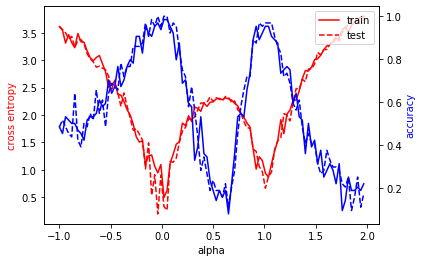

In [126]:
weights_1 = model_1(64, 1e-4, 2000)
weights_2 = model_1(1024, 1e-4, 2000)
train_cross_entropy, train_accuracy, test_cross_entropy, test_accuracy = final_data()
draw_fig(train_cross_entropy, train_accuracy, test_cross_entropy, test_accuracy) #batch size 64 vs. batch size 1024

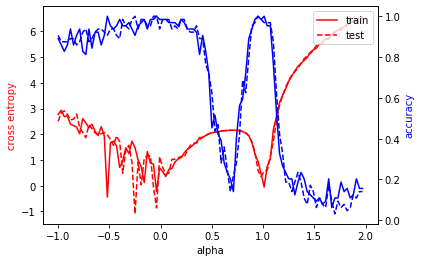

In [127]:
weights_1 = model_1(64, 1e-3, 2000)
weights_2 = model_1(64, 1e-2, 2000)
train_cross_entropy, train_accuracy, test_cross_entropy, test_accuracy = final_data()
draw_fig(train_cross_entropy, train_accuracy, test_cross_entropy, test_accuracy) #batch size 64 vs. batch size 1024